<a href="https://colab.research.google.com/github/keiiigo/UPA-2023/blob/Trabajo-Final-Big-Data/Trabajo_Open_Data_Exploraci%C3%B3n_de_Datos_Abiertos_en_Paraguay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploración de Datos Abiertos en Paraguay**

Total de puntos: 100 (equivalente al 30% de la calificación final)
Introducción:
En este trabajo práctico, nos enfocaremos en el uso y la exploración de datos abiertos en Paraguay, con el objetivo de adquirir experiencia práctica en el manejo de conjuntos de datos públicos. Los datos abiertos son aquellos que están disponibles para el acceso y uso público, y pueden ser utilizados para analizar, visualizar e investigar diversos aspectos de interés en diferentes campos.

## **Objetivos**:

Familiarizarse con los conceptos básicos de datos abiertos y su importancia.
Identificar fuentes de datos abiertos relevantes en Paraguay.
Descargar y preparar conjuntos de datos para su análisis.
Aplicar técnicas de exploración y visualización de datos.
Realizar análisis descriptivo e inferencial sobre los datos.

Los datos abiertos son de gran relevancia debido a la utilizacion de estas, en distintos analisis y visualizaciones que nos dan a entneder de una manera mas facil a los distintos datos.

En Paraguay, existen distintas fuentes de datos, aunque no del cien porciento relevantes, nos dan a entender de una manera mas amplia a los datos que buscamos.

"El Portal de datos abeirtos del Paraguay", "La Direccion General de Estadisticas, Encuestas y censos, "El Banco Central del Paraguay", "Ministerio de salud publica y bienestar", entre otras.

Para este analisis, dos csv van a ser utilizados,

https://datos.mec.gov.py/data/establecimientos

https://datos.mec.gov.py/data/matriculaciones_educacion_media

Ambas van a ser investigadas, limpiadas y visualizadas con el fin de encontrar la cantidad de alumnos, hombres al igual que mujeres y el tipo de matriculacion mas popular en el ano 2019. Particularmente elegi el anio 2019 debido a la pandemia, me gustaria ver cuales fueron las matriculas que mas se eligieron al igual que la cantidad de alumnos que los colegios tenian.

## **Desarrollo del trabajo:**
Explicar qué son los datos abiertos y por qué son importantes en el contexto de Paraguay.
Discutir los beneficios y las oportunidades que ofrecen los datos abiertos para la sociedad y el sector de la informática.
Identificación de fuentes de datos abiertos en Paraguay

Investigar y proporcionar una lista de fuentes de datos abiertos relevantes en Paraguay, como portales gubernamentales, instituciones públicas, organizaciones no gubernamentales, etc.
Seleccionar al menos dos conjuntos de datos para utilizar en el resto del trabajo práctico.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import datetime
import seaborn as sns

## **Descarga y preparación de datos**

Explicar cómo acceder y descargar los conjuntos de datos seleccionados.
Mostrar cómo limpiar y preparar los datos para su análisis, incluyendo la eliminación de valores faltantes, la normalización de formatos, etc.

In [2]:
pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 4.8 MB/s eta 0:00:00


In [3]:
#Agregar imports de la computadora de los csv
from google.colab import files
uploaded = files.upload()

In [4]:
#Leer los datos de los csv
df = pd.read_csv("establecimientos_20230621.csv", sep=',')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9199 entries, 0 to 9198
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   anio                     9199 non-null   int64  
 1   codigo_establecimiento   9199 non-null   int64  
 2   codigo_departamento      9199 non-null   int64  
 3   nombre_departamento      9199 non-null   object 
 4   codigo_distrito          9199 non-null   int64  
 5   nombre_distrito          9199 non-null   object 
 6   codigo_zona              9147 non-null   float64
 7   nombre_zona              9147 non-null   object 
 8   codigo_barrio_localidad  9075 non-null   float64
 9   nombre_barrio_localidad  9076 non-null   object 
 10  direccion                8418 non-null   object 
 11  coordenadas_y            7855 non-null   float64
 12  coordenadas_x            7855 non-null   float64
 13  latitud                  7855 non-null   object 
 14  longitud                

In [6]:
df.head(10000)

,anio,codigo_establecimiento,codigo_departamento,nombre_departamento,codigo_distrito,nombre_distrito,codigo_zona,nombre_zona,codigo_barrio_localidad,nombre_barrio_localidad,direccion,coordenadas_y,coordenadas_x,latitud,longitud,anho_cod_geo,uri
0,2021,1701016,17,Alto Paraguay,265,BAHÍA NEGRA,2.0,Rural,8984.0,CENTRAL,J J SANCHEZ,7761312.0,377648.0,"20º14'31""S","58º10'17.013""W",NaN,http://datos.mec.gov.py/id/establecimientos/17...
1,2021,1701014,17,Alto Paraguay,265,BAHÍA NEGRA,2.0,Rural,52120.0,COM INDIG 14 DE MAYO KARCHABALUT,S/D COMUNIDAD IND. KARCHA BAHLUT,NaN,NaN,NaN,NaN,NaN,http://datos.mec.gov.py/id/establecimientos/17...
2,2021,1701007,17,Alto Paraguay,265,BAHÍA NEGRA,2.0,Rural,8983.0,ZONA BAHIA NEGRA POTY,PUERTO ESPERANZA,7743280.0,389024.0,"20º24'19.991""S","58º3'48.985""W",NaN,http://datos.mec.gov.py/id/establecimientos/17...
3,2021,1701006,17,Alto Paraguay,265,BAHÍA NEGRA,1.0,Urbana,52121.0,COM INDIG PUERTO DIANA,PUERTO DIANA,NaN,NaN,NaN,NaN,NaN,http://datos.mec.gov.py/id/establecimientos/17...
4,2021,1701005,17,Alto Paraguay,265,BAHÍA NEGRA,1.0,Urbana,8984.0,CENTRAL,AVDA. J.J.SANCHEZ,7762844.0,378031.0,"20º13'41.26""S","58º10'3.442""W",NaN,http://datos.mec.gov.py/id/establecimientos/17...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9194,2021,309021,99,Territorio Nacional,1,TERRITORIO PARAGUAYO,2.0,Rural,5808.0,CARIY POTRERO,RUTA II KM 94(5 KM DE LA RUTA),7179488.0,518769.0,"25º30'6.012""S","56º48'47.652""W",NaN,http://datos.mec.gov.py/id/establecimientos/03...
9195,2021,319011,99,Territorio Nacional,1,TERRITORIO PARAGUAYO,2.0,Rural,5808.0,CARIY POTRERO,AL LADO DEL ORATORIO SAGRADA FAMILIA,7174004.0,518140.0,"25º33'4.322""S","56º49'9.918""W",NaN,http://datos.mec.gov.py/id/establecimientos/03...
9196,2021,309023,99,Territorio Nacional,1,TERRITORIO PARAGUAYO,2.0,Rural,5808.0,CARIY POTRERO,"RUTA 2 - MCAL. ESTIGARRIBIA KM 93,8 [LOCALIDAD...",7180135.0,519320.0,"25º29'44.953""S","56º48'27.948""W",NaN,http://datos.mec.gov.py/id/establecimientos/03...
9197,2021,309019,99,Territorio Nacional,1,TERRITORIO PARAGUAYO,2.0,Rural,5817.0,TACUATY,RUTA 2 KM 92 1/2,7178346.0,515850.0,"25º30'43.261""S","56º50'32.169""W",NaN,http://datos.mec.gov.py/id/establecimientos/03...


In [7]:
#Dropear columnas innecesarias
df = df.drop(['codigo_zona', 'codigo_barrio_localidad', 'anio', 'coordenadas_y', 'coordenadas_x', 'latitud', 'longitud', 'anho_cod_geo', 'uri'], axis=1)

In [8]:
df.shape[0]

9199

In [9]:
#Reemplazamos los textos
df['direccion'] = df['direccion'].str.replace('-', ' ')
df['direccion'] = df['direccion'].str.replace('[ ]', '')
df['direccion'] = df['direccion'].str.replace('%', '')
df['direccion'] = df['direccion'].str.replace('www.rue.mec.gov.py', '')

<ipython-input-9-62521ccc00e5>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['direccion'] = df['direccion'].str.replace('[ ]', '')
<ipython-input-9-62521ccc00e5>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['direccion'] = df['direccion'].str.replace('www.rue.mec.gov.py', '')


In [10]:
df['direccion'] = df['direccion'].str.replace('( )', ' ')

<ipython-input-10-571ea09f8b5a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['direccion'] = df['direccion'].str.replace('( )', ' ')


In [11]:
from unidecode import unidecode

df['nombre_departamento'] = df['nombre_departamento'].apply(lambda x: unidecode(x) if isinstance(x, str) else x)
df['nombre_distrito'] = df['nombre_distrito'].apply(lambda x: unidecode(x) if isinstance(x, str) else x)
df['nombre_zona'] = df['nombre_zona'].apply(lambda x: unidecode(x) if isinstance(x, str) else x)
df['nombre_barrio_localidad'] = df['nombre_barrio_localidad'].apply(lambda x: unidecode(x) if isinstance(x, str) else x)
df['direccion'] = df['direccion'].apply(lambda x: unidecode(x) if isinstance(x, str) else x)

In [12]:
df['nombre_departamento'] = df['nombre_departamento'].str.upper()
df['nombre_distrito'] = df['nombre_distrito'].str.upper()
df['nombre_zona'] = df['nombre_zona'].str.upper()
df['nombre_barrio_localidad'] = df['nombre_barrio_localidad'].str.upper()
df['direccion'] = df['direccion'].str.upper()

In [13]:
df.isnull().sum()

codigo_establecimiento       0
codigo_departamento          0
nombre_departamento          0
codigo_distrito              0
nombre_distrito              0
nombre_zona                 52
nombre_barrio_localidad    123
direccion                  781
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9199 entries, 0 to 9198
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   codigo_establecimiento   9199 non-null   int64 
 1   codigo_departamento      9199 non-null   int64 
 2   nombre_departamento      9199 non-null   object
 3   codigo_distrito          9199 non-null   int64 
 4   nombre_distrito          9199 non-null   object
 5   nombre_zona              9147 non-null   object
 6   nombre_barrio_localidad  9076 non-null   object
 7   direccion                8418 non-null   object
dtypes: int64(3), object(5)
memory usage: 575.1+ KB


In [15]:
df

,codigo_establecimiento,codigo_departamento,nombre_departamento,codigo_distrito,nombre_distrito,nombre_zona,nombre_barrio_localidad,direccion
0,1701016,17,ALTO PARAGUAY,265,BAHIA NEGRA,RURAL,CENTRAL,JJSANCHEZ
1,1701014,17,ALTO PARAGUAY,265,BAHIA NEGRA,RURAL,COM INDIG 14 DE MAYO KARCHABALUT,S/DCOMUNIDADIND.KARCHABAHLUT
2,1701007,17,ALTO PARAGUAY,265,BAHIA NEGRA,RURAL,ZONA BAHIA NEGRA POTY,PUERTOESPERANZA
3,1701006,17,ALTO PARAGUAY,265,BAHIA NEGRA,URBANA,COM INDIG PUERTO DIANA,PUERTODIANA
4,1701005,17,ALTO PARAGUAY,265,BAHIA NEGRA,URBANA,CENTRAL,AVDA.J.J.SANCHEZ
...,...,...,...,...,...,...,...,...
9194,309021,99,TERRITORIO NACIONAL,1,TERRITORIO PARAGUAYO,RURAL,CARIY POTRERO,RUTAIIKM94(5KMDELARUTA)
9195,319011,99,TERRITORIO NACIONAL,1,TERRITORIO PARAGUAYO,RURAL,CARIY POTRERO,ALLADODELORATORIOSAGRADAFAMILIA
9196,309023,99,TERRITORIO NACIONAL,1,TERRITORIO PARAGUAYO,RURAL,CARIY POTRERO,"RUTA2MCAL.ESTIGARRIBIAKM93,8[LOCALIDAD:CARIYPO..."
9197,309019,99,TERRITORIO NACIONAL,1,TERRITORIO PARAGUAYO,RURAL,TACUATY,RUTA2KM921/2


### **Limpieza de las matriculaciones**

In [16]:
df2 = pd.read_csv("matriculaciones_educacion_media_20230621.csv", sep=',')

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2738 entries, 0 to 2737
Data columns (total 22 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   anio                                          2738 non-null   int64  
 1   codigo_establecimiento                        2738 non-null   int64  
 2   codigo_departamento                           2738 non-null   int64  
 3   nombre_departamento                           2738 non-null   object 
 4   codigo_distrito                               2738 non-null   int64  
 5   nombre_distrito                               2738 non-null   object 
 6   codigo_zona                                   2738 non-null   int64  
 7   nombre_zona                                   2738 non-null   object 
 8   codigo_barrio_localidad                       2738 non-null   object 
 9   nombre_barrio_localidad                       2734 non-null   o

In [18]:
df2.head(10000)

,anio,codigo_establecimiento,codigo_departamento,nombre_departamento,codigo_distrito,nombre_distrito,codigo_zona,nombre_zona,codigo_barrio_localidad,nombre_barrio_localidad,...,sector_o_tipo_gestion,anho_cod_geo,matricula_cientifico_hombre,matricula_cientifico_mujer,matricula_tecnico_hombre,matricula_tecnico_mujer,matricula_media_abierta_hombre,matricula_media_abierta_mujer,matricula_formacion_profesional_media_hombre,matricula_formacion_profesional_media_mujer
0,2020,1701005,17,Alto Paraguay,4,Bahía Negra,1,Urbana,8984,CENTRAL,...,Oficial,NaN,19,23,0,0,0,0,0,0
1,2020,1701007,17,Alto Paraguay,4,Bahía Negra,2,Rural,8983,ZONA BAHIA NEGRA POTY,...,Oficial,NaN,0,0,0,0,21,31,0,0
2,2020,1702009,17,Alto Paraguay,5,Carmelo Peralta,1,Urbana,9204,VIRGEN DEL CARMEN,...,Oficial,NaN,29,31,0,0,0,0,0,0
3,2020,1702011,17,Alto Paraguay,5,Carmelo Peralta,2,Rural,9205,PUERTO SASTRE - LA ESPERANZA SUB-URBANO,...,Oficial,NaN,16,16,0,0,0,0,0,0
4,2020,1702005,17,Alto Paraguay,5,Carmelo Peralta,2,Rural,9203,PUERTO GUARANI - SUB URBANO,...,Oficial,NaN,13,17,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,2020,208218,2,San Pedro,19,Yrybucuá,2,Rural,4762,VY´A RENDA,...,Oficial,NaN,21,40,0,0,0,0,0,0
2734,2020,208235,2,San Pedro,19,Yrybucuá,2,Rural,4761,YVU PORA,...,Oficial,NaN,35,26,0,0,0,0,0,0
2735,2020,309022,99,Territorio Nacional,99,Territorio Paraguayo,2,Rural,5810,KAAGUY KUPE,...,Oficial,NaN,20,15,16,16,0,0,0,0
2736,2020,309023,99,Territorio Nacional,99,Territorio Paraguayo,2,Rural,5808,CARIY POTRERO,...,Oficial,NaN,9,9,0,0,0,0,0,0


In [19]:
df2 = df2.drop(['anio', 'codigo_distrito', 'codigo_zona', 'codigo_barrio_localidad'], axis=1)

In [20]:
df2

,codigo_establecimiento,codigo_departamento,nombre_departamento,nombre_distrito,nombre_zona,nombre_barrio_localidad,codigo_institucion,nombre_institucion,sector_o_tipo_gestion,anho_cod_geo,matricula_cientifico_hombre,matricula_cientifico_mujer,matricula_tecnico_hombre,matricula_tecnico_mujer,matricula_media_abierta_hombre,matricula_media_abierta_mujer,matricula_formacion_profesional_media_hombre,matricula_formacion_profesional_media_mujer
0,1701005,17,Alto Paraguay,Bahía Negra,Urbana,CENTRAL,2352,COLEGIO NACIONAL TTE. 1° ADOLFO ROJAS SILVA,Oficial,NaN,19,23,0,0,0,0,0,0
1,1701007,17,Alto Paraguay,Bahía Negra,Rural,ZONA BAHIA NEGRA POTY,3108,SEDE TUTORIAL EMA (ESC. BÁS. N° 2483 PUERTO ES...,Oficial,NaN,0,0,0,0,21,31,0,0
2,1702009,17,Alto Paraguay,Carmelo Peralta,Urbana,VIRGEN DEL CARMEN,8859,COLEGIO NACIONAL CAPITÁN MARCIAL RAMÍREZ,Oficial,NaN,29,31,0,0,0,0,0,0
3,1702011,17,Alto Paraguay,Carmelo Peralta,Rural,PUERTO SASTRE - LA ESPERANZA SUB-URBANO,6331,COLEGIO NACIONAL LA ESPERANZA,Oficial,NaN,16,16,0,0,0,0,0,0
4,1702005,17,Alto Paraguay,Carmelo Peralta,Rural,PUERTO GUARANI - SUB URBANO,7755,COLEGIO NACIONAL PUERTO GUARANÍ,Oficial,NaN,13,17,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,208218,2,San Pedro,Yrybucuá,Rural,VY´A RENDA,1861,COLEGIO NACIONAL VY'A RENDÁ,Oficial,NaN,21,40,0,0,0,0,0,0
2734,208235,2,San Pedro,Yrybucuá,Rural,YVU PORA,1843,COLEGIO NACIONAL YBU PORÃ,Oficial,NaN,35,26,0,0,0,0,0,0
2735,309022,99,Territorio Nacional,Territorio Paraguayo,Rural,KAAGUY KUPE,3777,COLEGIO NACIONAL DOÑA LIDIA ALVARENGA,Oficial,NaN,20,15,16,16,0,0,0,0
2736,309023,99,Territorio Nacional,Territorio Paraguayo,Rural,CARIY POTRERO,3775,COLEGIO NACIONAL PROF. IRENEO LÓPEZ OJEDA,Oficial,NaN,9,9,0,0,0,0,0,0


In [21]:
df2 = df2.drop(['anho_cod_geo'], axis=1)

In [22]:
df2

,codigo_establecimiento,codigo_departamento,nombre_departamento,nombre_distrito,nombre_zona,nombre_barrio_localidad,codigo_institucion,nombre_institucion,sector_o_tipo_gestion,matricula_cientifico_hombre,matricula_cientifico_mujer,matricula_tecnico_hombre,matricula_tecnico_mujer,matricula_media_abierta_hombre,matricula_media_abierta_mujer,matricula_formacion_profesional_media_hombre,matricula_formacion_profesional_media_mujer
0,1701005,17,Alto Paraguay,Bahía Negra,Urbana,CENTRAL,2352,COLEGIO NACIONAL TTE. 1° ADOLFO ROJAS SILVA,Oficial,19,23,0,0,0,0,0,0
1,1701007,17,Alto Paraguay,Bahía Negra,Rural,ZONA BAHIA NEGRA POTY,3108,SEDE TUTORIAL EMA (ESC. BÁS. N° 2483 PUERTO ES...,Oficial,0,0,0,0,21,31,0,0
2,1702009,17,Alto Paraguay,Carmelo Peralta,Urbana,VIRGEN DEL CARMEN,8859,COLEGIO NACIONAL CAPITÁN MARCIAL RAMÍREZ,Oficial,29,31,0,0,0,0,0,0
3,1702011,17,Alto Paraguay,Carmelo Peralta,Rural,PUERTO SASTRE - LA ESPERANZA SUB-URBANO,6331,COLEGIO NACIONAL LA ESPERANZA,Oficial,16,16,0,0,0,0,0,0
4,1702005,17,Alto Paraguay,Carmelo Peralta,Rural,PUERTO GUARANI - SUB URBANO,7755,COLEGIO NACIONAL PUERTO GUARANÍ,Oficial,13,17,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,208218,2,San Pedro,Yrybucuá,Rural,VY´A RENDA,1861,COLEGIO NACIONAL VY'A RENDÁ,Oficial,21,40,0,0,0,0,0,0
2734,208235,2,San Pedro,Yrybucuá,Rural,YVU PORA,1843,COLEGIO NACIONAL YBU PORÃ,Oficial,35,26,0,0,0,0,0,0
2735,309022,99,Territorio Nacional,Territorio Paraguayo,Rural,KAAGUY KUPE,3777,COLEGIO NACIONAL DOÑA LIDIA ALVARENGA,Oficial,20,15,16,16,0,0,0,0
2736,309023,99,Territorio Nacional,Territorio Paraguayo,Rural,CARIY POTRERO,3775,COLEGIO NACIONAL PROF. IRENEO LÓPEZ OJEDA,Oficial,9,9,0,0,0,0,0,0


In [23]:
df2['nombre_institucion'] = df2['nombre_institucion'].str.replace('-', ' ')
df2['nombre_institucion'] = df2['nombre_institucion'].str.replace('[ ]', '')
df2['nombre_institucion'] = df2['nombre_institucion'].str.replace('%', '')
df2['nombre_institucion'] = df2['nombre_institucion'].str.replace('www.rue.mec.gov.py', '')

<ipython-input-23-88c62a7b0bd0>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['nombre_institucion'] = df2['nombre_institucion'].str.replace('[ ]', '')
<ipython-input-23-88c62a7b0bd0>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['nombre_institucion'] = df2['nombre_institucion'].str.replace('www.rue.mec.gov.py', '')


In [24]:
df2['nombre_departamento'] = df2['nombre_departamento'].apply(lambda x: unidecode(x))
df2['nombre_distrito'] = df2['nombre_distrito'].apply(lambda x: unidecode(x))
df2['nombre_zona'] = df2['nombre_zona'].apply(lambda x: unidecode(x))
df2['nombre_institucion'] = df2['nombre_institucion'].apply(lambda x: unidecode(x))

In [25]:
df2.isnull().sum()

codigo_establecimiento                          0
codigo_departamento                             0
nombre_departamento                             0
nombre_distrito                                 0
nombre_zona                                     0
nombre_barrio_localidad                         4
codigo_institucion                              0
nombre_institucion                              0
sector_o_tipo_gestion                           0
matricula_cientifico_hombre                     0
matricula_cientifico_mujer                      0
matricula_tecnico_hombre                        0
matricula_tecnico_mujer                         0
matricula_media_abierta_hombre                  0
matricula_media_abierta_mujer                   0
matricula_formacion_profesional_media_hombre    0
matricula_formacion_profesional_media_mujer     0
dtype: int64

In [26]:
df2

,codigo_establecimiento,codigo_departamento,nombre_departamento,nombre_distrito,nombre_zona,nombre_barrio_localidad,codigo_institucion,nombre_institucion,sector_o_tipo_gestion,matricula_cientifico_hombre,matricula_cientifico_mujer,matricula_tecnico_hombre,matricula_tecnico_mujer,matricula_media_abierta_hombre,matricula_media_abierta_mujer,matricula_formacion_profesional_media_hombre,matricula_formacion_profesional_media_mujer
0,1701005,17,Alto Paraguay,Bahia Negra,Urbana,CENTRAL,2352,COLEGIONACIONALTTE.1degADOLFOROJASSILVA,Oficial,19,23,0,0,0,0,0,0
1,1701007,17,Alto Paraguay,Bahia Negra,Rural,ZONA BAHIA NEGRA POTY,3108,SEDETUTORIALEMA(ESC.BAS.Ndeg2483PUERTOESPERANZA),Oficial,0,0,0,0,21,31,0,0
2,1702009,17,Alto Paraguay,Carmelo Peralta,Urbana,VIRGEN DEL CARMEN,8859,COLEGIONACIONALCAPITANMARCIALRAMIREZ,Oficial,29,31,0,0,0,0,0,0
3,1702011,17,Alto Paraguay,Carmelo Peralta,Rural,PUERTO SASTRE - LA ESPERANZA SUB-URBANO,6331,COLEGIONACIONALLAESPERANZA,Oficial,16,16,0,0,0,0,0,0
4,1702005,17,Alto Paraguay,Carmelo Peralta,Rural,PUERTO GUARANI - SUB URBANO,7755,COLEGIONACIONALPUERTOGUARANI,Oficial,13,17,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,208218,2,San Pedro,Yrybucua,Rural,VY´A RENDA,1861,COLEGIONACIONALVY'ARENDA,Oficial,21,40,0,0,0,0,0,0
2734,208235,2,San Pedro,Yrybucua,Rural,YVU PORA,1843,COLEGIONACIONALYBUPORA,Oficial,35,26,0,0,0,0,0,0
2735,309022,99,Territorio Nacional,Territorio Paraguayo,Rural,KAAGUY KUPE,3777,COLEGIONACIONALDONALIDIAALVARENGA,Oficial,20,15,16,16,0,0,0,0
2736,309023,99,Territorio Nacional,Territorio Paraguayo,Rural,CARIY POTRERO,3775,COLEGIONACIONALPROF.IRENEOLOPEZOJEDA,Oficial,9,9,0,0,0,0,0,0


In [27]:
df2['Cientificos_matriculados'] = df2['matricula_cientifico_hombre'] + df2['matricula_cientifico_mujer']
df2['Tecnicos_matriculados'] = df2['matricula_tecnico_hombre'] + df2['matricula_tecnico_mujer']
df2['Media_matriculados'] = df2['matricula_media_abierta_hombre'] + df2['matricula_media_abierta_mujer']
df2['Profesionales_matriculados'] = df2['matricula_formacion_profesional_media_hombre'] + df2['matricula_formacion_profesional_media_mujer']

In [28]:
df2

,codigo_establecimiento,codigo_departamento,nombre_departamento,nombre_distrito,nombre_zona,nombre_barrio_localidad,codigo_institucion,nombre_institucion,sector_o_tipo_gestion,matricula_cientifico_hombre,...,matricula_tecnico_hombre,matricula_tecnico_mujer,matricula_media_abierta_hombre,matricula_media_abierta_mujer,matricula_formacion_profesional_media_hombre,matricula_formacion_profesional_media_mujer,Cientificos_matriculados,Tecnicos_matriculados,Media_matriculados,Profesionales_matriculados
0,1701005,17,Alto Paraguay,Bahia Negra,Urbana,CENTRAL,2352,COLEGIONACIONALTTE.1degADOLFOROJASSILVA,Oficial,19,...,0,0,0,0,0,0,42,0,0,0
1,1701007,17,Alto Paraguay,Bahia Negra,Rural,ZONA BAHIA NEGRA POTY,3108,SEDETUTORIALEMA(ESC.BAS.Ndeg2483PUERTOESPERANZA),Oficial,0,...,0,0,21,31,0,0,0,0,52,0
2,1702009,17,Alto Paraguay,Carmelo Peralta,Urbana,VIRGEN DEL CARMEN,8859,COLEGIONACIONALCAPITANMARCIALRAMIREZ,Oficial,29,...,0,0,0,0,0,0,60,0,0,0
3,1702011,17,Alto Paraguay,Carmelo Peralta,Rural,PUERTO SASTRE - LA ESPERANZA SUB-URBANO,6331,COLEGIONACIONALLAESPERANZA,Oficial,16,...,0,0,0,0,0,0,32,0,0,0
4,1702005,17,Alto Paraguay,Carmelo Peralta,Rural,PUERTO GUARANI - SUB URBANO,7755,COLEGIONACIONALPUERTOGUARANI,Oficial,13,...,0,0,0,0,0,0,30,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,208218,2,San Pedro,Yrybucua,Rural,VY´A RENDA,1861,COLEGIONACIONALVY'ARENDA,Oficial,21,...,0,0,0,0,0,0,61,0,0,0
2734,208235,2,San Pedro,Yrybucua,Rural,YVU PORA,1843,COLEGIONACIONALYBUPORA,Oficial,35,...,0,0,0,0,0,0,61,0,0,0
2735,309022,99,Territorio Nacional,Territorio Paraguayo,Rural,KAAGUY KUPE,3777,COLEGIONACIONALDONALIDIAALVARENGA,Oficial,20,...,16,16,0,0,0,0,35,32,0,0
2736,309023,99,Territorio Nacional,Territorio Paraguayo,Rural,CARIY POTRERO,3775,COLEGIONACIONALPROF.IRENEOLOPEZOJEDA,Oficial,9,...,0,0,0,0,0,0,18,0,0,0


In [29]:
df2['Hombres_matriculados'] = df2['matricula_formacion_profesional_media_hombre'] + df2['matricula_media_abierta_hombre'] +df2['matricula_tecnico_hombre'] +df2['matricula_cientifico_hombre']

In [30]:
df2['Mujeres_matriculadas'] = df2['matricula_formacion_profesional_media_mujer'] + df2['matricula_tecnico_mujer'] + df2['matricula_media_abierta_mujer'] + df2['matricula_cientifico_mujer']

In [31]:
df2

,codigo_establecimiento,codigo_departamento,nombre_departamento,nombre_distrito,nombre_zona,nombre_barrio_localidad,codigo_institucion,nombre_institucion,sector_o_tipo_gestion,matricula_cientifico_hombre,...,matricula_media_abierta_hombre,matricula_media_abierta_mujer,matricula_formacion_profesional_media_hombre,matricula_formacion_profesional_media_mujer,Cientificos_matriculados,Tecnicos_matriculados,Media_matriculados,Profesionales_matriculados,Hombres_matriculados,Mujeres_matriculadas
0,1701005,17,Alto Paraguay,Bahia Negra,Urbana,CENTRAL,2352,COLEGIONACIONALTTE.1degADOLFOROJASSILVA,Oficial,19,...,0,0,0,0,42,0,0,0,19,23
1,1701007,17,Alto Paraguay,Bahia Negra,Rural,ZONA BAHIA NEGRA POTY,3108,SEDETUTORIALEMA(ESC.BAS.Ndeg2483PUERTOESPERANZA),Oficial,0,...,21,31,0,0,0,0,52,0,21,31
2,1702009,17,Alto Paraguay,Carmelo Peralta,Urbana,VIRGEN DEL CARMEN,8859,COLEGIONACIONALCAPITANMARCIALRAMIREZ,Oficial,29,...,0,0,0,0,60,0,0,0,29,31
3,1702011,17,Alto Paraguay,Carmelo Peralta,Rural,PUERTO SASTRE - LA ESPERANZA SUB-URBANO,6331,COLEGIONACIONALLAESPERANZA,Oficial,16,...,0,0,0,0,32,0,0,0,16,16
4,1702005,17,Alto Paraguay,Carmelo Peralta,Rural,PUERTO GUARANI - SUB URBANO,7755,COLEGIONACIONALPUERTOGUARANI,Oficial,13,...,0,0,0,0,30,0,0,0,13,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,208218,2,San Pedro,Yrybucua,Rural,VY´A RENDA,1861,COLEGIONACIONALVY'ARENDA,Oficial,21,...,0,0,0,0,61,0,0,0,21,40
2734,208235,2,San Pedro,Yrybucua,Rural,YVU PORA,1843,COLEGIONACIONALYBUPORA,Oficial,35,...,0,0,0,0,61,0,0,0,35,26
2735,309022,99,Territorio Nacional,Territorio Paraguayo,Rural,KAAGUY KUPE,3777,COLEGIONACIONALDONALIDIAALVARENGA,Oficial,20,...,0,0,0,0,35,32,0,0,36,31
2736,309023,99,Territorio Nacional,Territorio Paraguayo,Rural,CARIY POTRERO,3775,COLEGIONACIONALPROF.IRENEOLOPEZOJEDA,Oficial,9,...,0,0,0,0,18,0,0,0,9,9


In [32]:
df2 = df2.drop(['matricula_cientifico_hombre','matricula_media_abierta_hombre','matricula_media_abierta_mujer','matricula_formacion_profesional_media_hombre','matricula_formacion_profesional_media_mujer'], axis=1)

In [33]:
df2

,codigo_establecimiento,codigo_departamento,nombre_departamento,nombre_distrito,nombre_zona,nombre_barrio_localidad,codigo_institucion,nombre_institucion,sector_o_tipo_gestion,matricula_cientifico_mujer,matricula_tecnico_hombre,matricula_tecnico_mujer,Cientificos_matriculados,Tecnicos_matriculados,Media_matriculados,Profesionales_matriculados,Hombres_matriculados,Mujeres_matriculadas
0,1701005,17,Alto Paraguay,Bahia Negra,Urbana,CENTRAL,2352,COLEGIONACIONALTTE.1degADOLFOROJASSILVA,Oficial,23,0,0,42,0,0,0,19,23
1,1701007,17,Alto Paraguay,Bahia Negra,Rural,ZONA BAHIA NEGRA POTY,3108,SEDETUTORIALEMA(ESC.BAS.Ndeg2483PUERTOESPERANZA),Oficial,0,0,0,0,0,52,0,21,31
2,1702009,17,Alto Paraguay,Carmelo Peralta,Urbana,VIRGEN DEL CARMEN,8859,COLEGIONACIONALCAPITANMARCIALRAMIREZ,Oficial,31,0,0,60,0,0,0,29,31
3,1702011,17,Alto Paraguay,Carmelo Peralta,Rural,PUERTO SASTRE - LA ESPERANZA SUB-URBANO,6331,COLEGIONACIONALLAESPERANZA,Oficial,16,0,0,32,0,0,0,16,16
4,1702005,17,Alto Paraguay,Carmelo Peralta,Rural,PUERTO GUARANI - SUB URBANO,7755,COLEGIONACIONALPUERTOGUARANI,Oficial,17,0,0,30,0,0,0,13,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,208218,2,San Pedro,Yrybucua,Rural,VY´A RENDA,1861,COLEGIONACIONALVY'ARENDA,Oficial,40,0,0,61,0,0,0,21,40
2734,208235,2,San Pedro,Yrybucua,Rural,YVU PORA,1843,COLEGIONACIONALYBUPORA,Oficial,26,0,0,61,0,0,0,35,26
2735,309022,99,Territorio Nacional,Territorio Paraguayo,Rural,KAAGUY KUPE,3777,COLEGIONACIONALDONALIDIAALVARENGA,Oficial,15,16,16,35,32,0,0,36,31
2736,309023,99,Territorio Nacional,Territorio Paraguayo,Rural,CARIY POTRERO,3775,COLEGIONACIONALPROF.IRENEOLOPEZOJEDA,Oficial,9,0,0,18,0,0,0,9,9


In [34]:
df2 = df2.drop(['matricula_cientifico_mujer',	'matricula_tecnico_hombre',	'matricula_tecnico_mujer'], axis = 1)

In [35]:
df2

,codigo_establecimiento,codigo_departamento,nombre_departamento,nombre_distrito,nombre_zona,nombre_barrio_localidad,codigo_institucion,nombre_institucion,sector_o_tipo_gestion,Cientificos_matriculados,Tecnicos_matriculados,Media_matriculados,Profesionales_matriculados,Hombres_matriculados,Mujeres_matriculadas
0,1701005,17,Alto Paraguay,Bahia Negra,Urbana,CENTRAL,2352,COLEGIONACIONALTTE.1degADOLFOROJASSILVA,Oficial,42,0,0,0,19,23
1,1701007,17,Alto Paraguay,Bahia Negra,Rural,ZONA BAHIA NEGRA POTY,3108,SEDETUTORIALEMA(ESC.BAS.Ndeg2483PUERTOESPERANZA),Oficial,0,0,52,0,21,31
2,1702009,17,Alto Paraguay,Carmelo Peralta,Urbana,VIRGEN DEL CARMEN,8859,COLEGIONACIONALCAPITANMARCIALRAMIREZ,Oficial,60,0,0,0,29,31
3,1702011,17,Alto Paraguay,Carmelo Peralta,Rural,PUERTO SASTRE - LA ESPERANZA SUB-URBANO,6331,COLEGIONACIONALLAESPERANZA,Oficial,32,0,0,0,16,16
4,1702005,17,Alto Paraguay,Carmelo Peralta,Rural,PUERTO GUARANI - SUB URBANO,7755,COLEGIONACIONALPUERTOGUARANI,Oficial,30,0,0,0,13,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,208218,2,San Pedro,Yrybucua,Rural,VY´A RENDA,1861,COLEGIONACIONALVY'ARENDA,Oficial,61,0,0,0,21,40
2734,208235,2,San Pedro,Yrybucua,Rural,YVU PORA,1843,COLEGIONACIONALYBUPORA,Oficial,61,0,0,0,35,26
2735,309022,99,Territorio Nacional,Territorio Paraguayo,Rural,KAAGUY KUPE,3777,COLEGIONACIONALDONALIDIAALVARENGA,Oficial,35,32,0,0,36,31
2736,309023,99,Territorio Nacional,Territorio Paraguayo,Rural,CARIY POTRERO,3775,COLEGIONACIONALPROF.IRENEOLOPEZOJEDA,Oficial,18,0,0,0,9,9


In [36]:
df2['Total_Matriculados'] = df2['Cientificos_matriculados'] + df2['Tecnicos_matriculados'] + df2['Media_matriculados'] + df2['Profesionales_matriculados']

In [37]:
df2

,codigo_establecimiento,codigo_departamento,nombre_departamento,nombre_distrito,nombre_zona,nombre_barrio_localidad,codigo_institucion,nombre_institucion,sector_o_tipo_gestion,Cientificos_matriculados,Tecnicos_matriculados,Media_matriculados,Profesionales_matriculados,Hombres_matriculados,Mujeres_matriculadas,Total_Matriculados
0,1701005,17,Alto Paraguay,Bahia Negra,Urbana,CENTRAL,2352,COLEGIONACIONALTTE.1degADOLFOROJASSILVA,Oficial,42,0,0,0,19,23,42
1,1701007,17,Alto Paraguay,Bahia Negra,Rural,ZONA BAHIA NEGRA POTY,3108,SEDETUTORIALEMA(ESC.BAS.Ndeg2483PUERTOESPERANZA),Oficial,0,0,52,0,21,31,52
2,1702009,17,Alto Paraguay,Carmelo Peralta,Urbana,VIRGEN DEL CARMEN,8859,COLEGIONACIONALCAPITANMARCIALRAMIREZ,Oficial,60,0,0,0,29,31,60
3,1702011,17,Alto Paraguay,Carmelo Peralta,Rural,PUERTO SASTRE - LA ESPERANZA SUB-URBANO,6331,COLEGIONACIONALLAESPERANZA,Oficial,32,0,0,0,16,16,32
4,1702005,17,Alto Paraguay,Carmelo Peralta,Rural,PUERTO GUARANI - SUB URBANO,7755,COLEGIONACIONALPUERTOGUARANI,Oficial,30,0,0,0,13,17,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,208218,2,San Pedro,Yrybucua,Rural,VY´A RENDA,1861,COLEGIONACIONALVY'ARENDA,Oficial,61,0,0,0,21,40,61
2734,208235,2,San Pedro,Yrybucua,Rural,YVU PORA,1843,COLEGIONACIONALYBUPORA,Oficial,61,0,0,0,35,26,61
2735,309022,99,Territorio Nacional,Territorio Paraguayo,Rural,KAAGUY KUPE,3777,COLEGIONACIONALDONALIDIAALVARENGA,Oficial,35,32,0,0,36,31,67
2736,309023,99,Territorio Nacional,Territorio Paraguayo,Rural,CARIY POTRERO,3775,COLEGIONACIONALPROF.IRENEOLOPEZOJEDA,Oficial,18,0,0,0,9,9,18


In [38]:
df2['nombre_departamento'] = df2['nombre_departamento'].str.upper()
df2['nombre_distrito'] = df2['nombre_distrito'].str.upper()
df2['nombre_zona'] = df2['nombre_zona'].str.upper()
df2['nombre_barrio_localidad'] = df2['nombre_barrio_localidad'].str.upper()
df2['sector_o_tipo_gestion'] = df2['sector_o_tipo_gestion'].str.upper()

### **Union de los dataframes**

In [39]:
df

,codigo_establecimiento,codigo_departamento,nombre_departamento,codigo_distrito,nombre_distrito,nombre_zona,nombre_barrio_localidad,direccion
0,1701016,17,ALTO PARAGUAY,265,BAHIA NEGRA,RURAL,CENTRAL,JJSANCHEZ
1,1701014,17,ALTO PARAGUAY,265,BAHIA NEGRA,RURAL,COM INDIG 14 DE MAYO KARCHABALUT,S/DCOMUNIDADIND.KARCHABAHLUT
2,1701007,17,ALTO PARAGUAY,265,BAHIA NEGRA,RURAL,ZONA BAHIA NEGRA POTY,PUERTOESPERANZA
3,1701006,17,ALTO PARAGUAY,265,BAHIA NEGRA,URBANA,COM INDIG PUERTO DIANA,PUERTODIANA
4,1701005,17,ALTO PARAGUAY,265,BAHIA NEGRA,URBANA,CENTRAL,AVDA.J.J.SANCHEZ
...,...,...,...,...,...,...,...,...
9194,309021,99,TERRITORIO NACIONAL,1,TERRITORIO PARAGUAYO,RURAL,CARIY POTRERO,RUTAIIKM94(5KMDELARUTA)
9195,319011,99,TERRITORIO NACIONAL,1,TERRITORIO PARAGUAYO,RURAL,CARIY POTRERO,ALLADODELORATORIOSAGRADAFAMILIA
9196,309023,99,TERRITORIO NACIONAL,1,TERRITORIO PARAGUAYO,RURAL,CARIY POTRERO,"RUTA2MCAL.ESTIGARRIBIAKM93,8[LOCALIDAD:CARIYPO..."
9197,309019,99,TERRITORIO NACIONAL,1,TERRITORIO PARAGUAYO,RURAL,TACUATY,RUTA2KM921/2


In [40]:
df2

,codigo_establecimiento,codigo_departamento,nombre_departamento,nombre_distrito,nombre_zona,nombre_barrio_localidad,codigo_institucion,nombre_institucion,sector_o_tipo_gestion,Cientificos_matriculados,Tecnicos_matriculados,Media_matriculados,Profesionales_matriculados,Hombres_matriculados,Mujeres_matriculadas,Total_Matriculados
0,1701005,17,ALTO PARAGUAY,BAHIA NEGRA,URBANA,CENTRAL,2352,COLEGIONACIONALTTE.1degADOLFOROJASSILVA,OFICIAL,42,0,0,0,19,23,42
1,1701007,17,ALTO PARAGUAY,BAHIA NEGRA,RURAL,ZONA BAHIA NEGRA POTY,3108,SEDETUTORIALEMA(ESC.BAS.Ndeg2483PUERTOESPERANZA),OFICIAL,0,0,52,0,21,31,52
2,1702009,17,ALTO PARAGUAY,CARMELO PERALTA,URBANA,VIRGEN DEL CARMEN,8859,COLEGIONACIONALCAPITANMARCIALRAMIREZ,OFICIAL,60,0,0,0,29,31,60
3,1702011,17,ALTO PARAGUAY,CARMELO PERALTA,RURAL,PUERTO SASTRE - LA ESPERANZA SUB-URBANO,6331,COLEGIONACIONALLAESPERANZA,OFICIAL,32,0,0,0,16,16,32
4,1702005,17,ALTO PARAGUAY,CARMELO PERALTA,RURAL,PUERTO GUARANI - SUB URBANO,7755,COLEGIONACIONALPUERTOGUARANI,OFICIAL,30,0,0,0,13,17,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,208218,2,SAN PEDRO,YRYBUCUA,RURAL,VY´A RENDA,1861,COLEGIONACIONALVY'ARENDA,OFICIAL,61,0,0,0,21,40,61
2734,208235,2,SAN PEDRO,YRYBUCUA,RURAL,YVU PORA,1843,COLEGIONACIONALYBUPORA,OFICIAL,61,0,0,0,35,26,61
2735,309022,99,TERRITORIO NACIONAL,TERRITORIO PARAGUAYO,RURAL,KAAGUY KUPE,3777,COLEGIONACIONALDONALIDIAALVARENGA,OFICIAL,35,32,0,0,36,31,67
2736,309023,99,TERRITORIO NACIONAL,TERRITORIO PARAGUAYO,RURAL,CARIY POTRERO,3775,COLEGIONACIONALPROF.IRENEOLOPEZOJEDA,OFICIAL,18,0,0,0,9,9,18


In [41]:
#Hacer el merge de los csv
df3 = pd.merge(df, df2,
               left_on=['codigo_establecimiento', 'nombre_departamento'],
               right_on=['codigo_establecimiento', 'nombre_departamento'], how='right')

In [42]:
df3

,codigo_establecimiento,codigo_departamento_x,nombre_departamento,codigo_distrito,nombre_distrito_x,nombre_zona_x,nombre_barrio_localidad_x,direccion,codigo_departamento_y,nombre_distrito_y,...,codigo_institucion,nombre_institucion,sector_o_tipo_gestion,Cientificos_matriculados,Tecnicos_matriculados,Media_matriculados,Profesionales_matriculados,Hombres_matriculados,Mujeres_matriculadas,Total_Matriculados
0,1701005,17.0,ALTO PARAGUAY,265.0,BAHIA NEGRA,URBANA,CENTRAL,AVDA.J.J.SANCHEZ,17,BAHIA NEGRA,...,2352,COLEGIONACIONALTTE.1degADOLFOROJASSILVA,OFICIAL,42,0,0,0,19,23,42
1,1701007,17.0,ALTO PARAGUAY,265.0,BAHIA NEGRA,RURAL,ZONA BAHIA NEGRA POTY,PUERTOESPERANZA,17,BAHIA NEGRA,...,3108,SEDETUTORIALEMA(ESC.BAS.Ndeg2483PUERTOESPERANZA),OFICIAL,0,0,52,0,21,31,52
2,1702009,17.0,ALTO PARAGUAY,531.0,CARMELO PERALTA,URBANA,VIRGEN DEL CARMEN,CARMELOPERALTA,17,CARMELO PERALTA,...,8859,COLEGIONACIONALCAPITANMARCIALRAMIREZ,OFICIAL,60,0,0,0,29,31,60
3,1702011,17.0,ALTO PARAGUAY,531.0,CARMELO PERALTA,RURAL,PUERTO SASTRE - LA ESPERANZA SUB-URBANO,MARIAAUXILIADORA,17,CARMELO PERALTA,...,6331,COLEGIONACIONALLAESPERANZA,OFICIAL,32,0,0,0,16,16,32
4,1702005,17.0,ALTO PARAGUAY,531.0,CARMELO PERALTA,RURAL,PUERTO GUARANI - SUB URBANO,[PUERTOGUARANI],17,CARMELO PERALTA,...,7755,COLEGIONACIONALPUERTOGUARANI,OFICIAL,30,0,0,0,13,17,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,208218,2.0,SAN PEDRO,32.0,YRYBUCUA,RURAL,VY'A RENDA,ASENT.VYARENDAYRYBUCUA[ASENT.VYARENDAYRYBUCUA],2,YRYBUCUA,...,1861,COLEGIONACIONALVY'ARENDA,OFICIAL,61,0,0,0,21,40,61
2734,208235,2.0,SAN PEDRO,32.0,YRYBUCUA,RURAL,YVU PORA,A5KM.ALESTEDEYRYBUCUA[YBUPORA],2,YRYBUCUA,...,1843,COLEGIONACIONALYBUPORA,OFICIAL,61,0,0,0,35,26,61
2735,309022,99.0,TERRITORIO NACIONAL,1.0,TERRITORIO PARAGUAYO,RURAL,KAAGUY KUPE,"RUTA2KM.94,5A200MTS.DELACAPILLASANTALIBRADA[LO...",99,TERRITORIO PARAGUAYO,...,3777,COLEGIONACIONALDONALIDIAALVARENGA,OFICIAL,35,32,0,0,36,31,67
2736,309023,99.0,TERRITORIO NACIONAL,1.0,TERRITORIO PARAGUAYO,RURAL,CARIY POTRERO,"RUTA2MCAL.ESTIGARRIBIAKM93,8[LOCALIDAD:CARIYPO...",99,TERRITORIO PARAGUAYO,...,3775,COLEGIONACIONALPROF.IRENEOLOPEZOJEDA,OFICIAL,18,0,0,0,9,9,18


In [43]:
#Ver los valores nulos y si son datos que son necesarios quitar los que estan nulos
df3.isnull().sum()

codigo_establecimiento          0
codigo_departamento_x           2
nombre_departamento             0
codigo_distrito                 2
nombre_distrito_x               2
nombre_zona_x                   2
nombre_barrio_localidad_x       6
direccion                     100
codigo_departamento_y           0
nombre_distrito_y               0
nombre_zona_y                   0
nombre_barrio_localidad_y       4
codigo_institucion              0
nombre_institucion              0
sector_o_tipo_gestion           0
Cientificos_matriculados        0
Tecnicos_matriculados           0
Media_matriculados              0
Profesionales_matriculados      0
Hombres_matriculados            0
Mujeres_matriculadas            0
Total_Matriculados              0
dtype: int64

In [44]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2738 entries, 0 to 2737
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   codigo_establecimiento      2738 non-null   int64  
 1   codigo_departamento_x       2736 non-null   float64
 2   nombre_departamento         2738 non-null   object 
 3   codigo_distrito             2736 non-null   float64
 4   nombre_distrito_x           2736 non-null   object 
 5   nombre_zona_x               2736 non-null   object 
 6   nombre_barrio_localidad_x   2732 non-null   object 
 7   direccion                   2638 non-null   object 
 8   codigo_departamento_y       2738 non-null   int64  
 9   nombre_distrito_y           2738 non-null   object 
 10  nombre_zona_y               2738 non-null   object 
 11  nombre_barrio_localidad_y   2734 non-null   object 
 12  codigo_institucion          2738 non-null   int64  
 13  nombre_institucion          2738 

In [45]:
df3['codigo_establecimiento'].nunique()

2676

In [46]:
#Borrar valores duplicados del codigo_establecimiento
df3['codigo_establecimiento'].drop_duplicates(inplace=True)
unique_count = df3['codigo_establecimiento'].nunique()

In [47]:
df3 = df3.drop(['codigo_institucion'], axis = 1)

In [48]:
df3 = df3.drop(['nombre_distrito_y','nombre_zona_y','nombre_barrio_localidad_y'], axis = 1)

In [49]:
df3 = df3.drop(['codigo_departamento_y'], axis = 1)

In [50]:
df3

,codigo_establecimiento,codigo_departamento_x,nombre_departamento,codigo_distrito,nombre_distrito_x,nombre_zona_x,nombre_barrio_localidad_x,direccion,nombre_institucion,sector_o_tipo_gestion,Cientificos_matriculados,Tecnicos_matriculados,Media_matriculados,Profesionales_matriculados,Hombres_matriculados,Mujeres_matriculadas,Total_Matriculados
0,1701005,17.0,ALTO PARAGUAY,265.0,BAHIA NEGRA,URBANA,CENTRAL,AVDA.J.J.SANCHEZ,COLEGIONACIONALTTE.1degADOLFOROJASSILVA,OFICIAL,42,0,0,0,19,23,42
1,1701007,17.0,ALTO PARAGUAY,265.0,BAHIA NEGRA,RURAL,ZONA BAHIA NEGRA POTY,PUERTOESPERANZA,SEDETUTORIALEMA(ESC.BAS.Ndeg2483PUERTOESPERANZA),OFICIAL,0,0,52,0,21,31,52
2,1702009,17.0,ALTO PARAGUAY,531.0,CARMELO PERALTA,URBANA,VIRGEN DEL CARMEN,CARMELOPERALTA,COLEGIONACIONALCAPITANMARCIALRAMIREZ,OFICIAL,60,0,0,0,29,31,60
3,1702011,17.0,ALTO PARAGUAY,531.0,CARMELO PERALTA,RURAL,PUERTO SASTRE - LA ESPERANZA SUB-URBANO,MARIAAUXILIADORA,COLEGIONACIONALLAESPERANZA,OFICIAL,32,0,0,0,16,16,32
4,1702005,17.0,ALTO PARAGUAY,531.0,CARMELO PERALTA,RURAL,PUERTO GUARANI - SUB URBANO,[PUERTOGUARANI],COLEGIONACIONALPUERTOGUARANI,OFICIAL,30,0,0,0,13,17,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,208218,2.0,SAN PEDRO,32.0,YRYBUCUA,RURAL,VY'A RENDA,ASENT.VYARENDAYRYBUCUA[ASENT.VYARENDAYRYBUCUA],COLEGIONACIONALVY'ARENDA,OFICIAL,61,0,0,0,21,40,61
2734,208235,2.0,SAN PEDRO,32.0,YRYBUCUA,RURAL,YVU PORA,A5KM.ALESTEDEYRYBUCUA[YBUPORA],COLEGIONACIONALYBUPORA,OFICIAL,61,0,0,0,35,26,61
2735,309022,99.0,TERRITORIO NACIONAL,1.0,TERRITORIO PARAGUAYO,RURAL,KAAGUY KUPE,"RUTA2KM.94,5A200MTS.DELACAPILLASANTALIBRADA[LO...",COLEGIONACIONALDONALIDIAALVARENGA,OFICIAL,35,32,0,0,36,31,67
2736,309023,99.0,TERRITORIO NACIONAL,1.0,TERRITORIO PARAGUAYO,RURAL,CARIY POTRERO,"RUTA2MCAL.ESTIGARRIBIAKM93,8[LOCALIDAD:CARIYPO...",COLEGIONACIONALPROF.IRENEOLOPEZOJEDA,OFICIAL,18,0,0,0,9,9,18


### **Exploracion y visualizaciones de datos**

Utilizar Python y la biblioteca pandas para cargar los datos y realizar una exploración inicial.
Mostrar cómo generar visualizaciones básicas, como gráficos de barras, histogramas, diagramas de dispersión, etc., para comprender mejor los datos.

In [51]:
df3.describe()

,codigo_establecimiento,codigo_departamento_x,codigo_distrito,Cientificos_matriculados,Tecnicos_matriculados,Media_matriculados,Profesionales_matriculados,Hombres_matriculados,Mujeres_matriculadas,Total_Matriculados
count,2.738000e+03,2736.000000,2736.000000,2738.000000,2738.000000,2738.000000,2738.000000,2738.000000,2738.000000,2738.000000
mean,7.407000e+05,8.538743,780.191886,70.987217,22.366691,2.024836,0.411614,46.736669,49.053689,95.790358
std,4.466910e+05,5.758704,3197.000690,93.411697,66.351248,13.137650,8.525556,65.612789,71.236691,135.178751
min,2.300000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,3.140450e+05,5.000000,74.000000,25.000000,0.000000,0.000000,0.000000,17.000000,17.000000,35.000000
50%,7.240445e+05,9.000000,158.000000,47.000000,0.000000,0.000000,0.000000,28.000000,28.000000,57.000000
75%,1.106016e+06,11.000000,199.000000,86.000000,21.000000,0.000000,0.000000,50.000000,52.000000,101.750000
max,1.703763e+06,99.000000,16863.000000,1245.000000,1524.000000,309.000000,359.000000,898.000000,1067.000000,1965.000000


In [52]:
#Cuales son los colegios con mas matriculados
#Para ver si los filtros estan correctamente usados
filtered_df = df3.sort_values('Total_Matriculados', ascending=False)
filtered_df = filtered_df.reset_index()

In [53]:
filtered_df

,index,codigo_establecimiento,codigo_departamento_x,nombre_departamento,codigo_distrito,nombre_distrito_x,nombre_zona_x,nombre_barrio_localidad_x,direccion,nombre_institucion,sector_o_tipo_gestion,Cientificos_matriculados,Tecnicos_matriculados,Media_matriculados,Profesionales_matriculados,Hombres_matriculados,Mujeres_matriculadas,Total_Matriculados
0,1385,1112001,11.0,CENTRAL,196.0,NEMBY,URBANA,CENTRO,9DEAGOSTOE/YTORORO[NEMBY],COLEGIONACIONALPABLOPATRICIOBOGARIN,OFICIAL,1245,720,0,0,898,1067,1965
1,1966,701022,7.0,ITAPUA,111.0,ENCARNACION,URBANA,LA CATEDRAL,MCAL.ESTIGARRIBIAE/MNOR.WIESSENYCERROCORA,CENTROREGIONALDEEDUCACIONGENERALPATRICIOESCOBAR,OFICIAL,1152,424,0,0,714,862,1576
2,1020,14088,20.0,CAPITAL,274.0,ASUNCION,URBANA,MARISCAL JOSE FELIX ESTIGARRIBIA,R.I.3CORRALESENTREDR.HASSLERYCAMPOSCERVERAASUN...,COLEGIOTECNICONACIONAL,OFICIAL,0,1524,0,0,864,660,1524
3,1121,1103023,11.0,CENTRAL,184.0,FERNANDO DE LA MORA,URBANA,LAGUNA SATI,LASRESIDENTASYCADETEPARQUET,COLEGIONACIONALDEE.M.D.DR.FERNANDODELAMORA,OFICIAL,784,564,0,0,690,658,1348
4,1299,1109043,11.0,CENTRAL,193.0,LUQUE,URBANA,CUARTO BARRIO,AVDA.GRAL.AQUINOYGRAL.DIAZ[LUQUE],COLEGIONACIONALDEE.M.D.GRAL.JOSEELIZARDOAQUINO,OFICIAL,984,364,0,0,634,714,1348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,2346,915038,9.0,PARAGUARI,157.0,YAGUARON,URBANA,SANTA LIBRADA,PEDROJUANCABALLEROC/VICTORRODRIGUEZ,COLEGIOPRIVADOSAGRADOCORAZONDEJESUS,PRIVADO,3,0,0,0,0,3,3
2734,882,15137,20.0,CAPITAL,274.0,ASUNCION,URBANA,VILLA MORRA,DRHASSLERNDEG5193C/CRUZDELCHACO,CENTROEDUCATIVOSANLUIS,PRIVADO,3,0,0,0,2,1,3
2735,1479,1114142,11.0,CENTRAL,199.0,SAN LORENZO,URBANA,SAN JUAN - LUCERITO,EDMUNDOREYESC/LUISIRRAZABAL,INSTITUTOPRIVADONUEVAERA,PRIVADO,3,0,0,0,1,2,3
2736,1468,1114186,11.0,CENTRAL,199.0,SAN LORENZO,URBANA,SANTA CRUZ,PANCHITOLOPEZYTENIENTEROJASSILVA,COLEGIOPRIVADOSANBLAS,PRIVADO,3,0,0,0,2,1,3


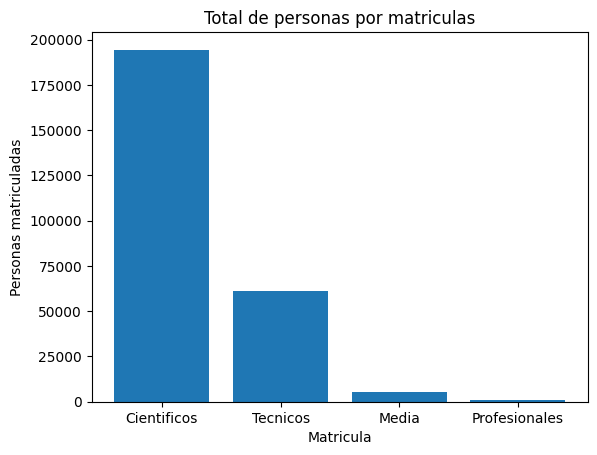

In [54]:
import matplotlib.pyplot as plt

# Calculo para las personas por matricula
total_cientificos = df3['Cientificos_matriculados'].sum()
total_tecnicos = df3['Tecnicos_matriculados'].sum()
total_media = df3['Media_matriculados'].sum()
total_profesionales = df3['Profesionales_matriculados'].sum()

# Crear el grafico
categories = ['Cientificos', 'Tecnicos', 'Media', 'Profesionales']
totals = [total_cientificos, total_tecnicos, total_media, total_profesionales]

#Asignar todas las categorias (x,y,titulo)
plt.bar(categories, totals)
plt.title('Total de personas por matriculas')
plt.xlabel('Matricula')
plt.ylabel('Personas matriculadas')

plt.show()

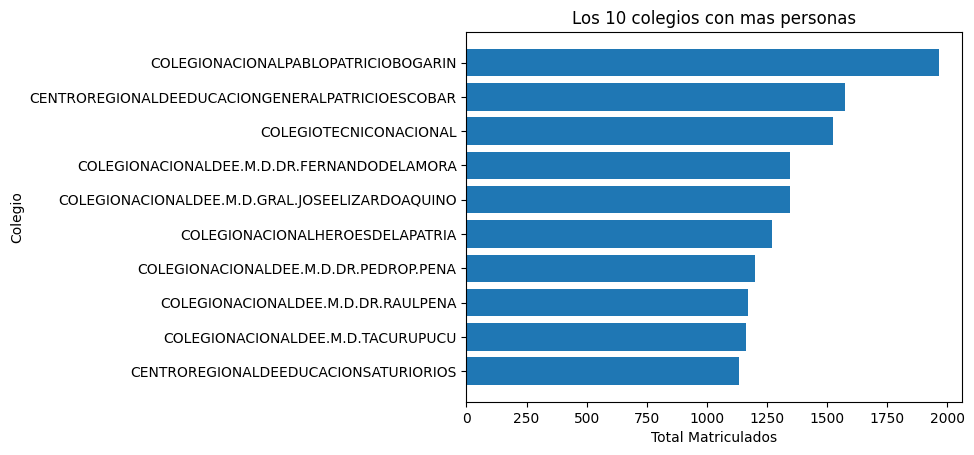

In [55]:
import matplotlib.pyplot as plt

# Poner la cantidad de universidades con menos personas
df_sorted = df3.sort_values('Total_Matriculados', ascending=False)

# Filtrar por los 10 colegios
top_5_colegios = df_sorted.head(10)

# Crear los graficos
colegios = top_5_colegios['nombre_institucion']
total_matriculados = top_5_colegios['Total_Matriculados']

#Mostrar en reversa
plt.barh(colegios[::-1], total_matriculados[::-1])

plt.title('Los 10 colegios con mas personas')
plt.xlabel('Total Matriculados')
plt.ylabel('Colegio')

plt.show()

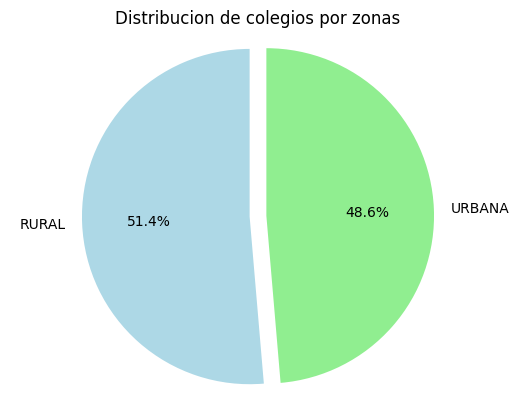

In [56]:
import matplotlib.pyplot as plt

#Obtener los valores de las zonas
zone_counts = df3['nombre_zona_x'].value_counts()

zonas_colegio = zone_counts.head(5000)

# Crear un grafico
labels = zonas_colegio.index
sizes = zonas_colegio.values
colors = ['lightblue', 'lightgreen']

#Explode se usa para crear un espacio entre los dos resultados
explode = [0.05] * len(zonas_colegio)

#Definimos las caracteristicas del grafico
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribucion de colegios por zonas')
plt.axis('equal')

plt.show()

### **Análisis descriptivo e inferencial**

Realizar análisis descriptivos de los datos, como calcular medidas estadísticas (media, mediana, desviación estándar, etc.) y generar resúmenes.
Realizar análisis inferenciales utilizando técnicas estadísticas básicas, como pruebas de hipótesis o intervalos de confianza
Formato de entrega.
Desarrollar cada ítem descrito anteriormente, y entregar tanto la parte teórica como el código de python y visualizaciones utilizando una notebook jupyter y cargarlo a un repositorio Github.

In [57]:
#Usado para solamente buscar la media, mediana, desviacion, estandar y el resto.
#Para este ejercicio especifico solamente usamos el de mujeres, hombres y total para tener una vision mas clara de estas variables en especifico
df3[['Mujeres_matriculadas', 'Hombres_matriculados', 'Total_Matriculados']].describe()

,Mujeres_matriculadas,Hombres_matriculados,Total_Matriculados
count,2738.000000,2738.000000,2738.000000
mean,49.053689,46.736669,95.790358
std,71.236691,65.612789,135.178751
min,0.000000,0.000000,2.000000
25%,17.000000,17.000000,35.000000
50%,28.000000,28.000000,57.000000
75%,52.000000,50.000000,101.750000
max,1067.000000,898.000000,1965.000000


In [58]:
#Es usada para buscar los distritos y sus valores unicos
distrito = len(df3['nombre_distrito_x'].unique())
print("Cantidad de distritos:", distrito)

distrito_nombre = df3['nombre_distrito_x'].mode()
print("Nombre de distrito:", distrito_nombre)

Cantidad de distritos: 254
Nombre de distrito: 0    ASUNCION
Name: nombre_distrito_x, dtype: object


Hay 254 diferentes colegios de Educacion Media en Asuncion de los 2738 colegios que estan correctamentes establecidos en la pagina del ministerio de educacion y ciencias.

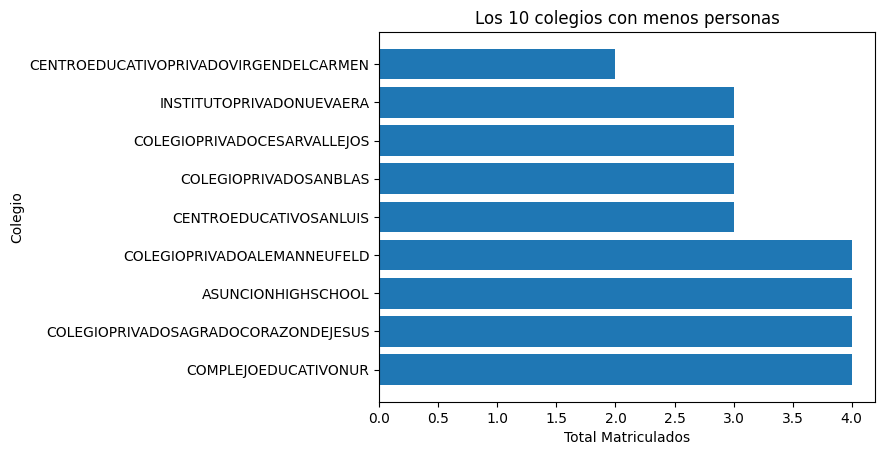

In [59]:
import matplotlib.pyplot as plt

# Poner la cantidad de universidades con menos personas
df_sorted = df3.sort_values('Total_Matriculados', ascending=True)

# Filtrar por los 10 colegios
top_5_colegios = df_sorted.head(10)

# Crear los graficos
colegios = top_5_colegios['nombre_institucion']
total_matriculados = top_5_colegios['Total_Matriculados']

#Mostrar en reversa
plt.barh(colegios[::-1], total_matriculados[::-1])

plt.title('Los 10 colegios con menos personas')
plt.xlabel('Total Matriculados')
plt.ylabel('Colegio')

plt.show()

El colegio con menor cantidad de alumnos matriculados como total es el "Centro Educativo Privado Virgen del Carmen" con solamente 2 estudiantes

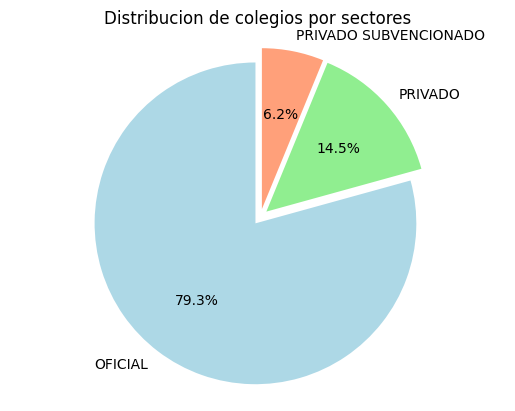

In [60]:
#Obtener los valores de los sectores
sector_counts = df3['sector_o_tipo_gestion'].value_counts()

sector_colegio = sector_counts.head(5000)

# Crear un grafico
labels = sector_colegio.index
sizes = sector_colegio.values
colors = ['lightblue', 'lightgreen','lightsalmon']

#Explode se usa para crear un espacio entre los dos resultados
explode = [0.05] * len(sector_colegio)

#Definimos las caracteristicas del grafico
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribucion de colegios por sectores')
plt.axis('equal')

plt.show()

In [61]:
import numpy as np
import scipy.stats as stats

# Datos de muestra
data = [2, 4, 6, 8, 10]

confianza = 0.95

# Cálculo del intervalo de confianza
mean = np.mean(data)
std_dev = np.std(data)
sample_size = len(data)
margin_of_error = stats.t.ppf((1 + confianza) / 2, sample_size - 1) * (std_dev / np.sqrt(sample_size))
intervalo_confianza = (mean - margin_of_error, mean + margin_of_error)

# Imprimir el intervalo de confianza
print("Intervalo de confianza:", intervalo_confianza)


Intervalo de confianza: (2.488043867659662, 9.511956132340337)


In [65]:
total_matriculados_suma = df3['Total_Matriculados'].sum()
print(total_matriculados_suma)

262274


In [72]:
from scipy import stats

#Asignamos un valor a la hipotesis, en este caso el total de matriculados
hipotesis_matriculados = df3["Total_Matriculados"]

#Este es el valor de significancia que ponnemos a lo que estamos buscando
valor = 0.1

#Ponemos una metrica, en este caso en caso de que sean menos de o igual a 30, resolvemos nuestra hipotesis
p_value = stats.binom_test((hipotesis_matriculados >= 30).sum(), len(hipotesis_matriculados), 0.5, alternative='less')

#Imprimimos lo siguiente para ver si es que nuestra hipotesis es correcta o incorrecta
if p_value > valor:
    print("La hipotesis no da el resultado, ya que hay menos de 30 matriculados en los colegios.")
else:
    print("La hipotesis da el resultado buscado, ya que hay mas de 30 matriculados en los colegios.")

La hipotesis no da el resultado, ya que hay menos de 30 matriculados en los colegios.


<ipython-input-72-18bb025d6c19>:6: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value = stats.binom_test((hipotesis_matriculados >= 30).sum(), len(hipotesis_matriculados), 0.5, alternative='less')


In [73]:
df3

,codigo_establecimiento,codigo_departamento_x,nombre_departamento,codigo_distrito,nombre_distrito_x,nombre_zona_x,nombre_barrio_localidad_x,direccion,nombre_institucion,sector_o_tipo_gestion,Cientificos_matriculados,Tecnicos_matriculados,Media_matriculados,Profesionales_matriculados,Hombres_matriculados,Mujeres_matriculadas,Total_Matriculados
0,1701005,17.0,ALTO PARAGUAY,265.0,BAHIA NEGRA,URBANA,CENTRAL,AVDA.J.J.SANCHEZ,COLEGIONACIONALTTE.1degADOLFOROJASSILVA,OFICIAL,42,0,0,0,19,23,42
1,1701007,17.0,ALTO PARAGUAY,265.0,BAHIA NEGRA,RURAL,ZONA BAHIA NEGRA POTY,PUERTOESPERANZA,SEDETUTORIALEMA(ESC.BAS.Ndeg2483PUERTOESPERANZA),OFICIAL,0,0,52,0,21,31,52
2,1702009,17.0,ALTO PARAGUAY,531.0,CARMELO PERALTA,URBANA,VIRGEN DEL CARMEN,CARMELOPERALTA,COLEGIONACIONALCAPITANMARCIALRAMIREZ,OFICIAL,60,0,0,0,29,31,60
3,1702011,17.0,ALTO PARAGUAY,531.0,CARMELO PERALTA,RURAL,PUERTO SASTRE - LA ESPERANZA SUB-URBANO,MARIAAUXILIADORA,COLEGIONACIONALLAESPERANZA,OFICIAL,32,0,0,0,16,16,32
4,1702005,17.0,ALTO PARAGUAY,531.0,CARMELO PERALTA,RURAL,PUERTO GUARANI - SUB URBANO,[PUERTOGUARANI],COLEGIONACIONALPUERTOGUARANI,OFICIAL,30,0,0,0,13,17,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,208218,2.0,SAN PEDRO,32.0,YRYBUCUA,RURAL,VY'A RENDA,ASENT.VYARENDAYRYBUCUA[ASENT.VYARENDAYRYBUCUA],COLEGIONACIONALVY'ARENDA,OFICIAL,61,0,0,0,21,40,61
2734,208235,2.0,SAN PEDRO,32.0,YRYBUCUA,RURAL,YVU PORA,A5KM.ALESTEDEYRYBUCUA[YBUPORA],COLEGIONACIONALYBUPORA,OFICIAL,61,0,0,0,35,26,61
2735,309022,99.0,TERRITORIO NACIONAL,1.0,TERRITORIO PARAGUAYO,RURAL,KAAGUY KUPE,"RUTA2KM.94,5A200MTS.DELACAPILLASANTALIBRADA[LO...",COLEGIONACIONALDONALIDIAALVARENGA,OFICIAL,35,32,0,0,36,31,67
2736,309023,99.0,TERRITORIO NACIONAL,1.0,TERRITORIO PARAGUAYO,RURAL,CARIY POTRERO,"RUTA2MCAL.ESTIGARRIBIAKM93,8[LOCALIDAD:CARIYPO...",COLEGIONACIONALPROF.IRENEOLOPEZOJEDA,OFICIAL,18,0,0,0,9,9,18


## **Conclusion**

Las base de datos abiertos en el Paraguay tienen un largo recorrido para llegar a ser como la de otros paises foraneos, de igual manera, cumplen su proposito hasta cierto punto. En especial, esta fuente, no tuvo muchos datos esperados, especialmente del sector de colegios privados en Asuncion, y otras ciudades. De igual manera se puede visualizar que entre los colegios que fueron filtrados, 262274 estudiantes estan matriculados durante los anos 2019 y 2020. El gran problema acontece al realmente fijarse en los colegios uno por uno, muchos cuenta con solamente 2-5 estudiantes, lo cual es bastante alarmante.

## **Diccionario**

**codigo_establecimiento:** Código de establecimiento permite identificar en forma única los diferentes establecimientos educativos que se encuentran en el país. El Sistema de informacion de Estadística Continua (SIEC) considera “Establecimiento Escolar” a la construcción que existe dentro de un predio (terreno) que se emplea para la enseñanza, donde puede funcionar una o más instituciones educativas con sus respectivos niveles/modalidades de educación.


**codigo_departamento:** Corresponde al código asignado según la cartografía nacional al departamento geográfico donde esta localizado el establecimiento escolar


**nombre_departamento:** Corresponde a la descripción del nombre del departamento geográfico correspondiente al código


**codigo_distrito:** Corresponde al código asignado al distrito del departamento geográfico donde esta localizado el establecimiento escolar


**nombre_distrito:** Corresponde a la descripción del nombre del distrito correspondiente al código


**nombre_zona:** Corresponde a la descripción del nombre de la zona correspondiente al código


**nombre_barrio_localidad:** Corresponde a la descripción del nombre del barrio o localidad correspondiente al código

**direccion:** Corresponde al nombre de la calle, avenida, carretera, etc., del establecimiento escolar


**nombre_institucion:** Corresponde a la descripción del nombre de la institución correspondiente al código


**sector_o_tipo_gestion:** Sector al que pertenece una institución educativa.
Se considera :
OFICIAL: Sector o tipo de gestión al que pertenece una institución educativa cuya organización y administración está a cargo del Estado paraguayo (Ministerio de Educación y Cultura, gobernaciones, municipios, binacionales). PRIVADA: Sector o tipo de gestión al que pertenece una institución educativa cuya organización y administración está a cargo de un organismo no estatal.
PRIVADA SUBVENCIONADA: Sector o tipo de gestión al que pertenece una institución de gestión privada que recibe algún aporte del Estado, como ser rubros para docentes, monto en guaraníes, etc

**Cientificos_matriculados:** Representa la cantidad de estudiantes inscriptos del 1° al 3° curso de la Educación Media, con orientación hacia el Bachillerato Científico, comprende tres énfasis: Letras y Artes; Ciencias Sociales; y Ciencias Básicas y Tecnología

**Tecnicos_matriculados:** Representa la cantidad de estudiantes inscriptos del 1° al 3° curso de la Educación Media, en la modalidad de Bachillerato Técnico (Industrial, Servicios y Agropecuario)

**Media_matriculados:** Representa la cantidad de estudiantes inscriptos en la modalidad Media Abierta que está dirigida a jóvenes de 15 a 20 años que han terminado el noveno grado de la Educación Escolar Básica, pero que no han ingresado por alguna razón a la Educación Media convencional. Este modelo educativo permite un aprendizaje flexible, según el ritmo y las posibilidades de tiempo de cada estudiante. Pretende con una oferta diferente de formación, dar respuesta a diferentes necesidades de aprendizaje y albergar a jóvenes en situaciones de deserción escolar

**Profesionales_matriculados:** Representa la cantidad de estudiantes inscriptos en la modalidad de Formación Profesional de la Media, programas educativos orientados hacia la capacitación laboral, ofrece oportunidades de profesionalización de distinto grado de calificación y especialidad. La formación profesional está dirigida a la formación en áreas relacionadas con la producción de bienes y servicios.
Para cursar la formación profesional se requiere haber concluido los 6 años de la Educación Escolar Básica

**hombres_matriculados:** La suma de hombres que estan matriculados en cada matricula.

**mujeres_matriculados:** La suma de mujeres que estan matriculados en cada matricula.

**Total__Matriculados:**La suma de hombres y mujeres que estan matriculados en cada matricula.